In [1]:
from PIL import Image, ImageFont, ImageDraw,ImageEnhance,ImageTransform,ImageFilter
import numpy as np
import random
from PIL import ImageFilter
from sklearn.cluster import KMeans
import re

def templete(no1=12,no2=8,fact=100,border=20):
    color_of_character_shade=(255,255,255)
    with open('charater_in_sequence.txt') as file:
        ms=file.read()
    w,h=(no1*fact,no2*fact)
    img=Image.new('RGB',(w,h),(0,0,0))
    draw=ImageDraw.Draw(img)
    for i in range(no1+1):
        draw.line((i*fact,0,i*fact,h),width=border,fill=color_of_character_shade)
    for i in range(no2+1):
        draw.line((0,i*fact,w,i*fact),width=border,fill=color_of_character_shade)
        #draw=ImageDraw.Draw(img)
    font = ImageFont.truetype('PetitFormalScript-Regular.ttf', 60) 
    #font = ImageFont.truetype('SunshineBoulevardPersonalUse-05wR.ttf', 60) 
    for i in range(12):
        for j in range(8):
            mw=8*i+j
            draw.text(xy=(i*100+23,j*100+10),text=ms[mw],font=font,fill=color_of_character_shade)

    img.save('templete.png')

#templete()    

In [13]:
%%time

   
def character_extract(img,n_clusters=2):
        color_of_character=(0,0,0)
        color_of_page=(255,255,255)
        arr1=np.array(img)
        x1,x2,x3=arr1.shape

        arr1=arr1.reshape((x1*x2,3))
        mm=KMeans(n_clusters=n_clusters)
        arr2=mm.fit(arr1)
        arr3=arr2.labels_
        if(arr1[arr3==0].shape[0]>arr1[arr3==1].shape[0]):
            arr1[arr3==1]= color_of_character
            arr1[arr3==0]= color_of_page
        else:    
            arr1[arr3==0]= color_of_character
            arr1[arr3==1]= color_of_page

        arr2=arr1.reshape((x1,x2,x3))
        im=Image.fromarray(arr2)
        #if(im.size[0]<im.size[1]):
            #return(im.rotate(90,expand=1))
        return(im)    
def user_image_to_segmentation_character():
    color_of_character=(0,0,0)
    color_of_page=(255,255,255)
    with open('charater_in_sequence.txt') as file:
        ms=file.read()
    img=Image.open('grid_font3.jpeg')
    md={i:'' for i in ms}
    
    if(img.size[0]<img.size[1]):
        img=img.rotate(90,expand=1)
    img=img.resize((12*350,8*350))
    ml=[]
    for i in range(12):
        for j in range(8):
            ii,jj=(i*350,j*350)
            ml.append(img.crop((ii,jj,ii+350,jj+350)))

    for j,i in enumerate(ml):
        img=(character_extract(i))#.filter(ImageFilter.BLUR))#?.filter(ImageFilter.SHARPEN)
        arr=np.array(img.rotate(90))
        #ta=arr[arr.sum(axis=1).sum(axis=1)!=sum(color_of_page)*350]
        #print(np.unique(ta))
        img=Image.fromarray(arr[arr.sum(axis=1).sum(axis=1)!=sum(color_of_page)*350]).rotate(-90,expand=1)
        name='./characters_cropped_image/{}.png'.format(j)
        img.save(name)
        #print(np.unique(np.array(img)))
        #display(img)
#user_image_to_segmentation_character()
    

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


In [14]:
from tkinter import *
from tkinter.ttk import *
import tkinter.font as tkfont
master = Tk()
master.geometry("1500x1000",)
master.configure(bg='slate blue')


  # configure Text widget tab stops




def highlight(conf):
    for i in page_lst:
        
        try:
            i['head'].tag_add(conf, "sel.first", "sel.last")     
        except TclError:
            pass
        try:
            i['side'].tag_add(conf, "sel.first", "sel.last")     
        except TclError:
            pass
        try:
            i['page'].tag_add(conf, "sel.first", "sel.last")     
        except TclError:
            pass

        
to_code=[]       
def close():
    
    for page in page_lst:
        md={}
        for j in ['head','side','page']:
            
            mt=page[j].get("1.0",'end-1c')
            mt=mt.replace('\t',' ')
            final_lst_red=[str(i) for i in page[j].tag_ranges('red_conf')]
            final_lst_black=[str(i) for i in page[j].tag_ranges('black_conf')]
            md[j]={'text':mt,'red':final_lst_red,'black':final_lst_black}
        to_code.append(md)
            
    master.destroy()    
        
    


page_lst=[] 
def new_paraa():
    global x,y
    
    head = Text(master, height = 3,width = 80,bg = "white",foreground='blue',wrap='word',spacing2=8,spacing3=8)
    #head.place(x=10,y=10,anchor = NW)
    
    head.tag_configure('red_conf', background="white", foreground="red")
    head.tag_configure('black_conf', background="white", foreground="black")
    
    
    font =tkfont.Font(font=head['font'])  # get font associated with Text widget
    tab_width = font.measure(' ' * 1)  # compute desired width of tabs
    head.config(tabs=(tab_width,))
    
    
    side = Text(master, height = 30,width = 10,bg = "white",foreground='blue',wrap='word',spacing2=8,spacing3=8)
    side.tag_configure('red_conf', background="white", foreground="red")
    side.tag_configure('black_conf', background="white", foreground="black")
    side.config(tabs=(tab_width,))

    #side.place(x=10,y=50,anchor = NW)

    page = Text(master,height = 30,width = 70,bg = "white",foreground='blue',wrap='word',spacing2=8,spacing3=8)
    page.tag_configure('red_conf', background="white", foreground="red")
    page.tag_configure('black_conf', background="white", foreground="black")
    page.config(tabs=(tab_width,))
    #page.place(x=80,y=50,anchor = NW)

    page_lst.append({'side':side,'page':page,'head':head})
curr=0    


           
            
    

def change_page(no):
    global curr
    try:
        page_lst[curr]['head'].place_forget()
        page_lst[curr]['side'].place_forget()
        page_lst[curr]['page'].place_forget()
    except:   
        pass

    page_lst[no-1]['head'].place(x=10,y=10,anchor = NW)
    page_lst[no-1]['side'].place(x=10,y=80,anchor = NW)
    page_lst[no-1]['page'].place(x=80,y=80,anchor = NW)
    curr=no-1
from pprint import pprint    
button=[]    
def new_page():
    new_paraa()
    pos=(len(page_lst))*25+10
    page_button= Button(master, text = len(page_lst),command=lambda m=len(page_lst):change_page(m))
    page_button.place(x = 580, y = pos,anchor=NW)
    page_button.invoke()
    button.append(page_button)
    
page_new= Button(master, text = "+",command=lambda:new_page())
page_new.place(x = 580, y = 10,anchor=NW)  

RED= Button(master, text = "CONVERT SELECTED TO RED",command=lambda:highlight('red_conf'))
RED.place(x = 700, y = 10,anchor=NW)
BLACK= Button(master, text = "CONVERT SELECTED TO BLACK",command=lambda:highlight('black_conf'))
BLACK.place(x = 700, y = 35,anchor=NW)
CLOSE= Button(master, text = "CLOSE",command=lambda:close())
CLOSE.place(x = 700, y =60,anchor=NW)



page_new.invoke()  
#button[0].invoke()
    
mainloop()


In [15]:
from PIL import Image, ImageFont, ImageDraw,ImageEnhance,ImageTransform,ImageFilter
import numpy as np
import random
from PIL import ImageFilter
from sklearn.cluster import KMeans
import re
#color_of_character=(0,0,255)
#color_of_page=(240,240,240)


            
#img=generate_word_img('Ritik-Badiya-Patidar')#.filter(ImageFilter.GaussianBlur(radius=0.8))   




class my_page():
    def __init__(self,ch_to_red=[],ch_to_black=[],
                 color_ch=(0,220,0),new=True,number_of_lines=33,
                 color_of_line=(255,0,0),line_width=50,want_logo=True,
                 position=(400,50),logo_no=2,size_of_logo=(300,100),
                 width=1425,color_of_page=(240,240,240),
                 upper_margin_in_no_of_lines=3,side_margin=150,
                 color_of_side_margin=(100,0,100),double_line_in_side_margin=True,
                 double_line_in_upper_margin=True,width_of_double_margin=10,
                 quad_randomness=150,density_of_error_ticks=50,probability_of_non_white_ticks=1,
                spacing_beween_characters=3):
        self.number_of_lines=number_of_lines
        self.color_of_line=color_of_line
        self.line_width=line_width
        self.want_logo=want_logo
        self.color_of_logo=color_of_line
        self.position=position
        self.logo_no=logo_no
        self.size_of_logo=size_of_logo
        self.width=width
        self.color_of_page=color_of_page
        self.upper_margin_in_no_of_lines=upper_margin_in_no_of_lines
        self.side_margin=side_margin
        self.color_of_side_margin=color_of_side_margin
        self.double_line_in_side_margin=double_line_in_side_margin
        self.double_line_in_upper_margin=double_line_in_upper_margin
        self.width_of_double_margin=width_of_double_margin
        self.quad_randomness=quad_randomness
        self.density_of_error_ticks=density_of_error_ticks
        self.probability_of_non_white_ticks=probability_of_non_white_ticks
        self.spacing_beween_characters=spacing_beween_characters
        self.new=new
        self.c1=0
        self.c2=0
        self.ch_to_red=ch_to_red
        self.ch_to_black=ch_to_black
        self.color_ch=color_ch
        self.img=self.Generate_page()
        self.md=self.make_dic()
        

            
        
    def random_img(self):
        return self.quad(self.set_background())   
    
    def two_percentage_based_number(self,no):
        stretching_perc=50
        n1=int(no-no*(stretching_perc)/100)
        n2=int(no+no*(stretching_perc)/100)
        return(n1,n2)

    
    
    def stretch_horizontal(self,im):
        im.size[0]//2
        l,h=self.two_percentage_based_number(im.size[0]//2)
        half=im.size[0]//2
        no1=np.random.randint(low=l, high=h, size=1)[0]
        no2=np.random.randint(low=l, high=h, size=1)[0]
        im1=im.crop((0,0,half,im.size[1])).resize((no1,im.size[1]))
        im2=im.crop((half,0,im.size[0],im.size[1])).resize((no2,im.size[1]))
        im3 = Image.new("RGB", (no1+no2,im.size[1]), (0,0,0))
        im3.paste(im1,(0,0))
        im3.paste(im2,(no1,0))
        return(im3.resize(im.size))
    def stretch_vertical(self,im):
        l,h=self.two_percentage_based_number(im.size[1]//2)
        half=im.size[1]//2
        no1=np.random.randint(low=l, high=h, size=1)[0]
        no2=np.random.randint(low=l, high=h ,size=1)[0]
        im1=im.crop((0,0,im.size[0],half)).resize((im.size[0],no1))
        im2=im.crop((0,half,im.size[0],im.size[1])).resize((im.size[0],no2))
        im3 = Image.new("RGB", (im.size[0],no1+no2), (0,0,0))
        im3.paste(im1,(0,0))
        im3.paste(im2,(0,no1))
        return(im3.resize(im.size))

    
    def make_dic(self):
        with open('charater_in_sequence.txt') as file:
            ms=file.read()
            md={}
        for i,j in enumerate(ms):
            #md[j]=Image.open('./characters_cropped_image_A-Z/{}.png'.format(i))
            md[j]=Image.open('./characters_cropped_image_A-Z/{}.png'.format(i))
        return md

    
    def generate_word_img_REAL(self,st):
        ml=[]
        color_change_lst=re.findall(r'<<<.{3,5}>>>',st)
        blue_ch=[]
        black_ch=[]
        red_ch=[]
        
        for i in color_change_lst:
            ind=st.index(i)
            
            if(len(i)==9):
                red_ch.append(ind)
                st=st[:ind]+st[ind+9:]
            if(len(i)==11):
                black_ch.append(ind)
                st=st[:ind]+st[ind+11:]
            if(len(i)==10):
                blue_ch.append(ind)
                st=st[:ind]+st[ind+10:]    
                    
        for j,i in enumerate(st):
            if(j in blue_ch):
                self.color_ch=(0,0,220)
            if(j in red_ch):
                self.color_ch=(220,0,0)
            if(j in black_ch):
                self.color_ch=(50,50,50)
     
            if  i.isalpha():
                #display(md[i])
                
                
                ar=np.array(self.md[i])
                ar[ar.sum(axis=2)!=0]=self.color_of_page
                ar[ar.sum(axis=2)==0]=self.color_ch
                
                
                
                img=self.stretch_vertical(self.stretch_horizontal(Image.fromarray(ar)))
                #img=md[i]
                #display(img)
                #img=character_extract(img)
                ar=np.array(img)
                mask=[True]*(350//2)+list(ar[(350//2):,:,:].sum(axis=1).sum(axis=1)!=img.size[0]*sum(self.color_of_page))
                img=Image.fromarray(ar[mask])
                ml.append(img)
            else:
                
                
                ar=np.array(self.md[i])
                ar[ar.sum(axis=2)!=0]=self.color_of_page
                ar[ar.sum(axis=2)==0]=self.color_ch
                #img=character_extract(md[i])
                ml.append(Image.fromarray(ar))

        if(len(st) in blue_ch):
            self.color_ch=(0,0,220)
        if(len(st) in red_ch):
            self.color_ch=(220,0,0)
        if(len(st) in black_ch):
            self.color_ch=(50,50,50)


        w,h=sum([i.size[0] for i in ml])+len(st)*self.spacing_beween_characters,((350//7)*5)
        img=Image.new('RGB',(w,h),self.color_of_page)
        x=0
        
        
        for j,i in enumerate(ml):
            if st[j].isalpha():
                if(st[j]in['q','y','p','f','g']):
                    img.paste(i,(x,((350//7)*5)-i.size[1]))
                else:    
                    img.paste(i,(x,((350//7)*5)-i.size[1]-(350//7)))
            else:
                img.paste(i,(x,0-(350//7)))
            x+=(i.size[0]+spacing_beween_characters)


        #arr=np.array(img)
        #img=Image.fromarray(arr[arr.sum(axis=1).sum(axis=1)!=344250])

        #display(img)
        return(img.resize((img.size[0]//5,img.size[1]//5))) 
    
    
    
    
    def generate_word_img(self,st,spacing_beween_characters=3):
        ml=[]
        
        for j,i in enumerate(st):
            self.ch_color()
            if  i.isalpha():
                #display(md[i])
                ar=np.array(self.md[i])
                ar[ar.sum(axis=2)!=0]=self.color_of_page
                ar[ar.sum(axis=2)==0]=self.color_ch
                img=self.stretch_vertical(self.stretch_horizontal(Image.fromarray(ar)))
                #img=md[i]
                #display(img)
                #img=character_extract(img)
                ar=np.array(img)
                mask=[True]*(350//2)+list(ar[(350//2):,:,:].sum(axis=1).sum(axis=1)!=img.size[0]*sum(self.color_of_page))
                img=Image.fromarray(ar[mask])
                ml.append(img)
            else:
                if(i not in self.md.keys()):
                    i="-"
                ar=np.array(self.md[i])
                ar[ar.sum(axis=2)!=0]=self.color_of_page
                ar[ar.sum(axis=2)==0]=self.color_ch
                #img=character_extract(md[i])
                ml.append(Image.fromarray(ar))
            #print((self.c1,self.c2))    
            self.c2+=1
        w,h=sum([i.size[0] for i in ml])+len(st)*spacing_beween_characters,((350//7)*5)
        img=Image.new('RGB',(w,h),self.color_of_page)
        x=0
        
        
        for j,i in enumerate(ml):
            if st[j].isalpha():
                if(st[j]in['q','y','p','f','g']):
                    img.paste(i,(x,((350//7)*5)-i.size[1]))
                else:    
                    img.paste(i,(x,((350//7)*5)-i.size[1]-(350//7)))
            else:
                img.paste(i,(x,0-(350//7)))
            x+=(i.size[0]+spacing_beween_characters)


        #arr=np.array(img)
        #img=Image.fromarray(arr[arr.sum(axis=1).sum(axis=1)!=344250])

        #display(img)
        return(img.resize((img.size[0]//5,img.size[1]//5))) 

    
    
    def Generate_page(self):
        
        height=(self.upper_margin_in_no_of_lines+self.number_of_lines)*self.line_width
        if(self.new):
            img=Image.new('RGB',(self.width,height),self.color_of_page)
        else:    
            img=self.img
            #display(self.img)
            #img=Image.open('page1.png')
        draw=ImageDraw.Draw(img)


        #upper margin double line
        if(self.double_line_in_upper_margin):
            draw.line((0,self.upper_margin_in_no_of_lines*self.line_width+self.width_of_double_margin,self.width,self.upper_margin_in_no_of_lines*self.line_width+self.width_of_double_margin),self.color_of_line)

        #side margin
        if(self.double_line_in_side_margin):
            draw.line((self.side_margin,0,self.side_margin,height),self.color_of_side_margin)
            draw.line((self.side_margin+self.width_of_double_margin,0,self.side_margin+self.width_of_double_margin,height),self.color_of_side_margin)
        else:
            draw.line((self.side_margin,0,self.side_margin,height),self.color_of_side_margin)

        #all main lines    
        for i in range(self.upper_margin_in_no_of_lines,self.upper_margin_in_no_of_lines+self.number_of_lines):
            draw.line((0,i*self.line_width,self.width,i*self.line_width),self.color_of_line)

        #logo
        if(self.want_logo):
            logo_img=self.logo_making()
            logo_img=logo_img.resize(self.size_of_logo)
            img.paste(logo_img,(img.size[0]-self.position[0],self.position[1]))

        # random ticks
        """for i in range(self.density_of_error_ticks*10000):
            x=random.randint(0,self.width-1)
            y=random.randint(0,height-1)
            if(img.getpixel((x,y))==self.color_of_page):
                if(random.randint(1,10000)<=self.probability_of_non_white_ticks):
                    img.putpixel((x,y),self.color_of_line)
            else:
                img.putpixel((x,y),self.color_of_page)"""
        #img.save('page1.png')
        return img
    def quad(self,img):
        fact=self.quad_randomness
        mn=[random.randint(0,fact) for i in range(8)]
        w,h=img.size
        img=img.transform(size=img.size,data=(mn[0],mn[1],mn[2],h-mn[3],w-mn[4],h-mn[5],w-mn[6],mn[7]),method=Image.QUAD)
        return(img)
    def set_background(self):
        img=self.img
        w,h=img.size
        background=Image.open('background.jpeg')
        background=background.resize((w+200,h+200))
        background.paste(img,(100,100))
        return background.filter(ImageFilter.GaussianBlur(radius=1))
    def logo_making(self,n_clusters=2):
        img=Image.open('date_logo{}.jpeg'.format(self.logo_no))
        arr1=np.array(img)
        x1,x2,x3=arr1.shape

        arr1=arr1.reshape((x1*x2,3))
        mm=KMeans(n_clusters=n_clusters)
        arr2=mm.fit(arr1)
        arr3=arr2.labels_
        if(arr1[arr3==0].shape[0]>arr1[arr3==1].shape[0]):
            arr1[arr3==1]=self.color_of_logo
            arr1[arr3==0]=self.color_of_page
        else:    
            arr1[arr3==0]=self.color_of_logo
            arr1[arr3==1]=self.color_of_page

        arr2=arr1.reshape((x1,x2,x3))
        im=Image.fromarray(arr2)
        if(im.size[0]<im.size[1]):
            return(im.rotate(90,expand=1))
        return(im)
    
    def writing_REAL(self,ms):
        ml=ms.split('\n')
        #page1=page(color_of_page=color_of_page).img
        X,Y=self.side_margin+15,(self.upper_margin_in_no_of_lines+1)*self.line_width+10
        x,y=X,Y
        for text in ml:
            #global page1
            #print(text.split())
            for i in text.split(' '):
                try:
                    img=self.generate_word_img(i)
                    display(img)
                    #print(img.size)
                    if(x+img.size[0]>=self.img.size[0]):
                        x=X+random.randint(1,14)
                        y+=50

                    self.img.paste(img,(x,y+random.randint(1,10)))
                    x+=img.size[0]+20+random.randint(1,5)
                except Exception as e:
                    if(i==''):
                        x+=20
                    else:    
                        print(e)
                    pass
            y+=50 
            x=X+random.randint(1,14)

        self.new=False
        #display(self.img)
        self.img=self.Generate_page()
    def ch_color(self):   
        if(str(self.c1)+'.'+str(self.c2) in self.ch_to_red):
            if(self.ch_to_red.index(str(self.c1)+'.'+str(self.c2))%2==0):
                self.color_ch=(255,0,0)
            else:
                self.color_ch=(0,0,255)
        if(str(self.c1)+'.'+str(self.c2) in self.ch_to_black):
            if(self.ch_to_black.index(str(self.c1)+'.'+str(self.c2))%2==0):
                self.color_ch=(30,30,30)
            else:
                self.color_ch=(0,0,255)

    
    def writing_page(self,ms,X,Y,L):
        self.color_ch=(0,0,255)
        self.c1=0
        self.c2=-1
        ml=ms.split('\n')
        #page1=page(color_of_page=color_of_page).img
        #X,Y=self.side_margin+15,(self.upper_margin_in_no_of_lines+1)*self.line_width+10
        x,y=X,Y
        for text in ml:
            
            self.ch_color()
            self.c1+=1
            self.c2=-1
            #global page1
            #print(text.split())
            for i in text.split(' '):
                self.ch_color()
                self.c2+=1
                try:
                    img=self.generate_word_img(i)
                    #display(img)
                    #print(img.size)
                    #if(x+len(i)*18>self.img.size[0]):
                    if(x+len(i)*18>L):
                        x=X#+random.randint(1,14)
                        y+=self.line_width

                    self.img.paste(img,(x,y+random.randint(1,10)))
                    x+=(len(i)+1)*18#-img.size[0]#+random.randint(1,5)
                except Exception as e:
                    if(i==''):
                        x+=18
                    else:    
                        print(e)
                    pass
            y+=50 
            x=X#+random.randint(1,14)
        self.new=False
        #display(self.img)
        self.img=self.Generate_page()
            
            
    def writer(self,md):
        ms=md['page']['text']
        self.ch_to_black=md['page']['black']
        self.ch_to_red=md['page']['red']
        X,Y=self.side_margin+15,(self.upper_margin_in_no_of_lines+1)*self.line_width+10
        L=self.img.size[0]
        self.writing_page(ms,X,Y,L)
        
        ms=md['side']['text']
        self.ch_to_black=md['side']['black']
        self.ch_to_red=md['side']['red']
        X,Y=0,(self.upper_margin_in_no_of_lines+1)*self.line_width+10
        L=self.side_margin
        self.writing_page(ms,X,Y,L)
        
        ms=md['head']['text']
        self.ch_to_black=md['head']['black']
        self.ch_to_red=md['head']['red']
        X,Y=0,0
        L=self.img.size[0]
        self.writing_page(ms,X,Y,L)
     
        
    
            
    

In [16]:
%%time
pages=[]
for i in to_code:
    p=my_page(color_of_page=(220,220,220),color_ch=(255,255,255),number_of_lines=33)
    p.writer(i)
    pages.append(p)
    


CPU times: user 28.1 s, sys: 4.23 s, total: 32.3 s
Wall time: 10.4 s


In [17]:
for j,i in enumerate(pages):
    i.img.save('./eng/que{}{}.png'.format(input('que number'),j))


que number5


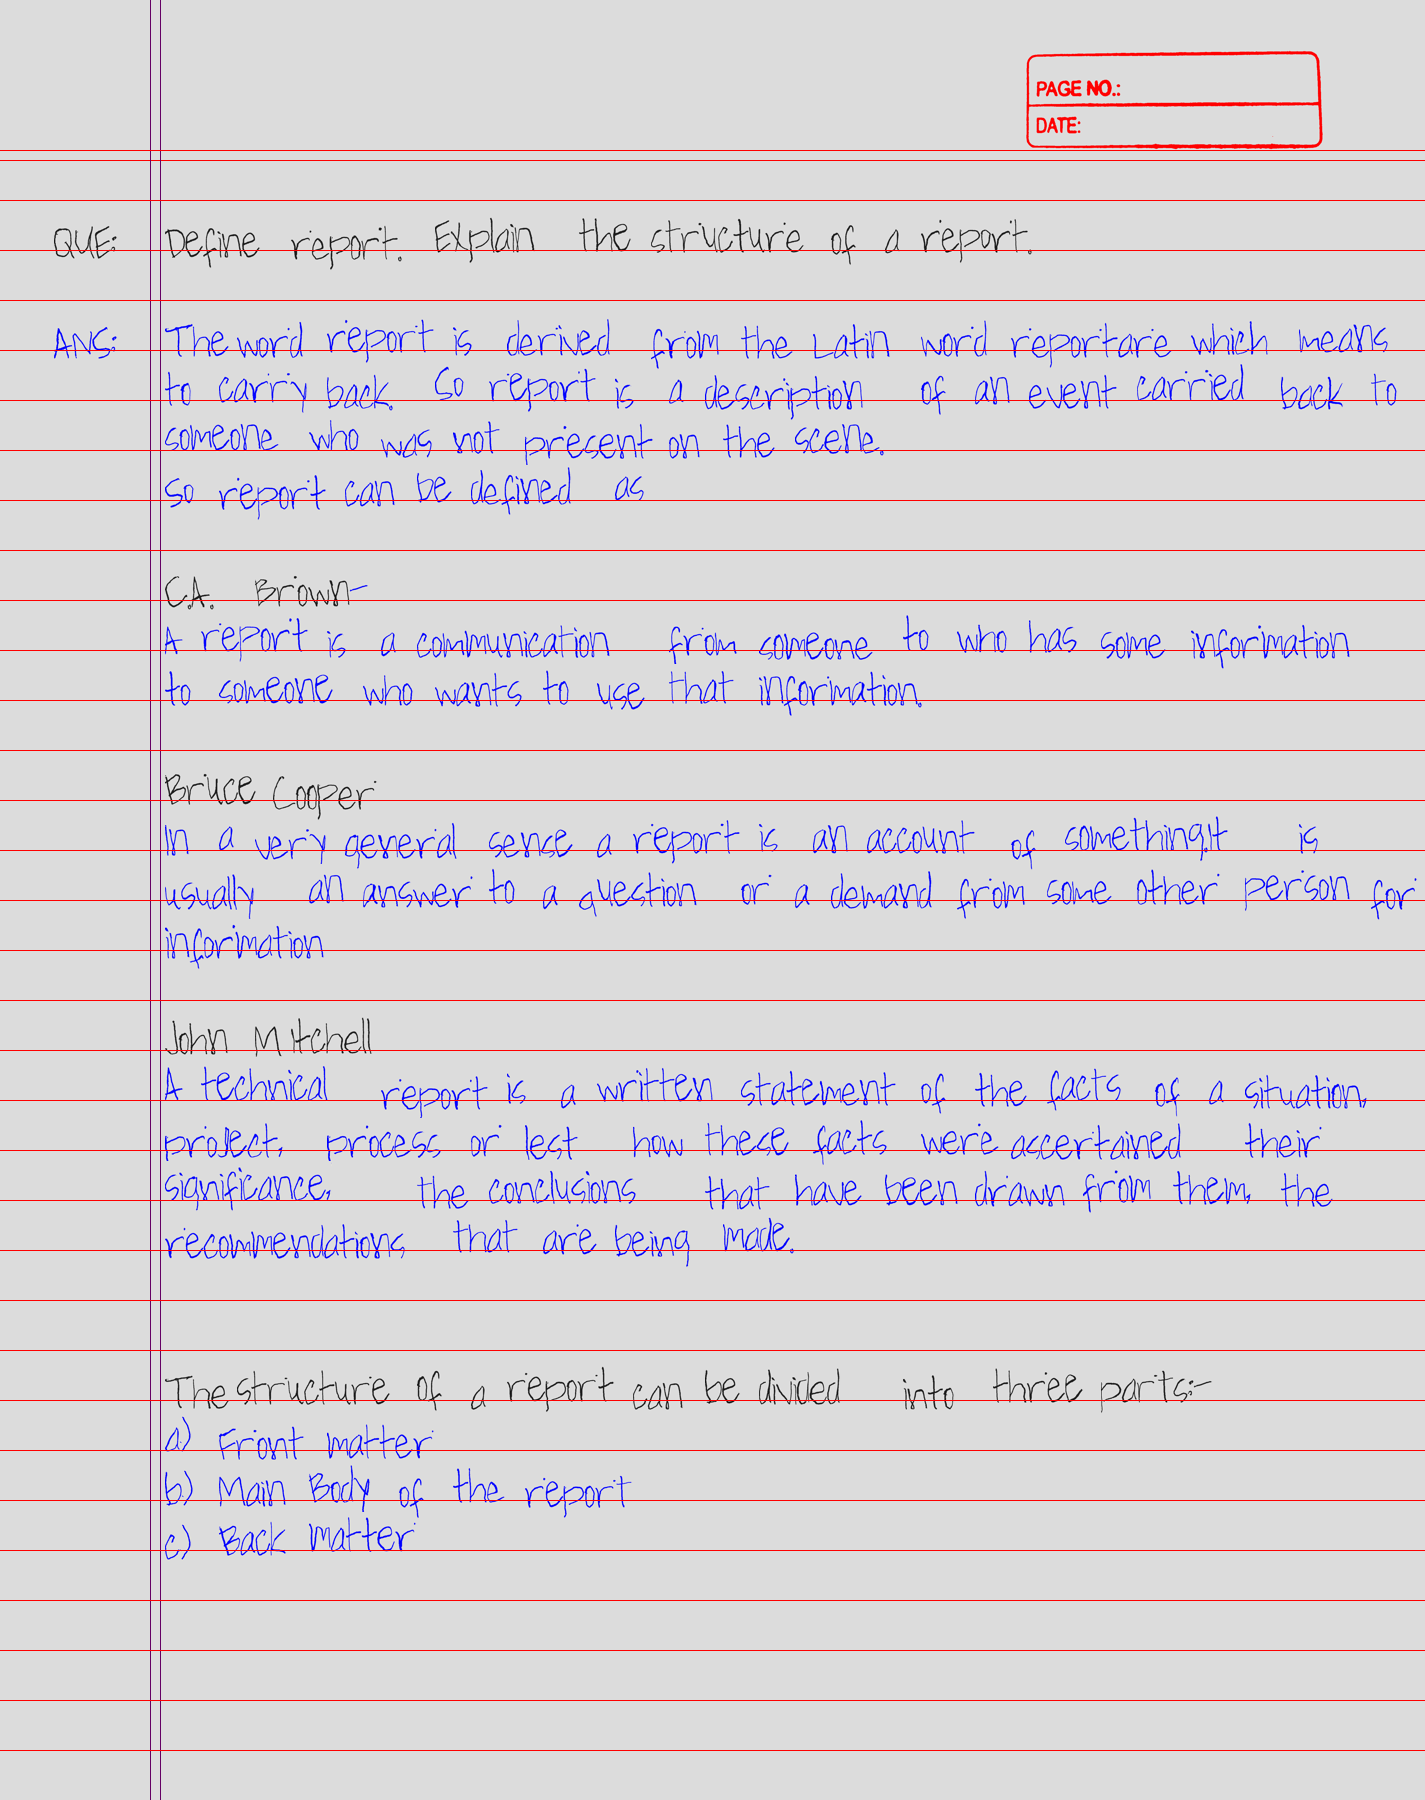